## Import necessary libraries 

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load and check the data

In [51]:
data = pd.read_csv("creditcard.csv")

In [52]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
data.shape

(284807, 31)

In [54]:
# chek if there are null's
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
data["Class"].sum()
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [56]:
# the dataset not balanced

# Balance the Dataset

In [57]:
fraud = data[data["Class"] == 1]
valid = data[data["Class"] == 0]

In [58]:
fraud.shape, valid.shape

((492, 31), (284315, 31))

In [59]:
valid = valid.sample(fraud.shape[0])
valid.shape

(492, 31)

In [60]:
data = fraud.append(valid, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,114057.0,1.557459,-2.690446,-0.929935,-1.624655,-1.246892,1.427014,-1.470191,0.464769,-0.983720,...,-0.100528,-0.455058,0.192539,-1.712411,-0.909848,-0.358405,0.024251,-0.011939,311.00,0
980,45448.0,1.244062,-0.376675,0.076212,-0.171905,-0.773298,-1.011351,-0.019773,-0.207750,-1.480958,...,-0.632735,-1.554557,0.181374,0.488985,0.126288,0.135708,-0.055976,0.012580,56.70,0
981,59206.0,1.051196,0.133728,0.165563,1.024783,0.091485,-0.001683,0.189513,0.096024,-0.352869,...,-0.384001,-1.320985,0.155284,-0.405042,0.152497,-0.808583,0.008623,0.022100,65.90,0
982,127463.0,-0.471280,1.244525,-0.721512,-1.041476,0.807655,-0.058353,0.582925,0.422643,-0.291301,...,-0.280580,-0.687420,-0.044277,-1.379150,-0.235978,0.210921,0.230905,0.069619,9.99,0


In [61]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [62]:
X = data.drop("Class", axis=1)
Y = data["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

In [63]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [64]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,77518.0,1.008972,-2.118834,1.045044,-0.729150,-2.406084,-0.000314,-1.362008,0.017496,-0.701326,...,0.100776,-0.036939,0.173370,-0.269052,0.443209,0.428451,-0.012359,0.048430,0.065004,233.51
898,158372.0,0.259371,0.218955,0.033866,-2.080609,0.182185,-1.325319,0.738860,-0.342945,0.982286,...,0.005208,0.139000,0.642846,-0.030444,-0.041803,-0.548108,-0.289341,0.144689,0.108686,18.18
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,147557.0,-1.448475,-0.245611,-0.871425,0.260042,1.351087,-1.834451,0.612849,-0.216703,0.071868,...,-0.637463,0.145582,1.215171,0.912416,-0.082691,-0.115522,-0.145792,-0.159486,-0.256763,7.39
739,63321.0,-1.821459,0.556828,0.088184,-1.965307,1.127096,3.880134,-0.938728,1.981056,0.248900,...,0.003264,-0.179022,-0.747061,-0.158273,1.067001,0.399725,0.880596,-0.125775,-0.069689,63.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,68063.0,1.338812,-0.924672,0.752889,-0.655530,-1.276228,-0.017662,-1.129896,0.063385,-0.007095,...,0.166513,0.273984,0.769331,-0.239573,-0.407443,0.545639,0.002332,0.039772,0.023488,50.00
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,41598.0,-0.538686,-0.635328,-0.041569,-3.022158,0.771776,3.556774,-1.418820,1.371999,-2.475053,...,-0.103447,-0.090409,-0.310254,0.168510,0.955413,-0.427495,-0.375891,0.051010,0.072416,60.01


In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [67]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [68]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

# Buil CNN

In [69]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))


In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [71]:
model.compile(optimizer=Adam(lr=0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [72]:
history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 11ms/step - loss: 1.0783 - accuracy: 0.6150 - val_loss: 0.6285 - val_accuracy: 0.7157
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6084 - accuracy: 0.7687 - val_loss: 0.5865 - val_accuracy: 0.7208
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4931 - accuracy: 0.8094 - val_loss: 0.5559 - val_accuracy: 0.7310
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4677 - accuracy: 0.8361 - val_loss: 0.5231 - val_accuracy: 0.7766
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4138 - accuracy: 0.8501 - val_loss: 0.4892 - val_accuracy: 0.8173
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4346 - accuracy: 0.8323 - val_loss: 0.4462 - val_accuracy: 0.8629
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3021 - accuracy: 0.8691 - val_loss: 0.4119 - val_accuracy: 0.8782
Epoch 8/20
25/25 [=

In [73]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9188


[0.20015360414981842, 0.9187816977500916]

In [74]:
def plot_learning_curve(history, epochs):
    # Plot training and validation accuracy
    epochs_range = range(1,epochs+1)
    plt.plot(epochs_range, history.history["accuracy"])
    plt.plot(epochs_range, history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "val"], loc="upper left")
    plt.show()
    
    # Plot training and validation loss
    
    
    plt.plot(epochs_range, history.history["loss"])
    plt.plot(epochs_range, history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "val"], loc="upper left")
    plt.show()

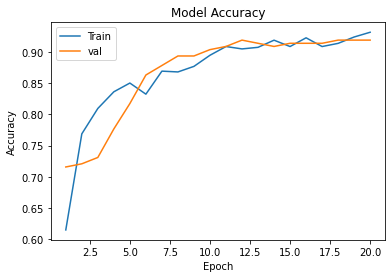

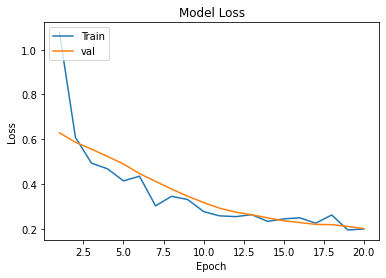

In [75]:
plot_learning_curve(history, epochs)

## Adding MaxPool

In [86]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(lr=0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 0s 14ms/step - loss: 1.4290 - accuracy: 0.5006 - val_loss: 0.7055 - val_accuracy: 0.4416
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 1.0803 - accuracy: 0.5921 - val_loss: 0.6819 - val_accuracy: 0.6345
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.9082 - accuracy: 0.6302 - val_loss: 0.6618 - val_accuracy: 0.6294
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.7079 - accuracy: 0.7001 - val_loss: 0.6401 - val_accuracy: 0.6244
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.7030 - accuracy: 0.7052 - val_loss: 0.6170 - val_accuracy: 0.6244
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6233 - accuracy: 0.7484 - val_loss: 0.5904 - val_accuracy: 0.6650
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5442 - accuracy: 0.7726 - val_loss: 0.5669 - val_accuracy: 0.6802
Epoch 8/50
25/25 [=

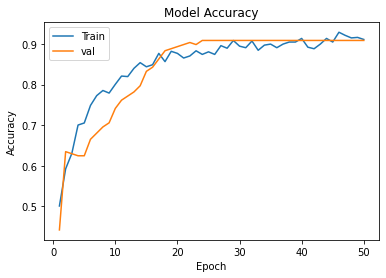

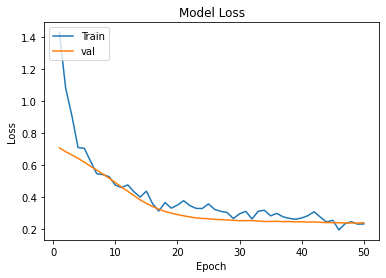

In [87]:
plot_learning_curve(history, epochs)